In [724]:
import pandas as pd
import numpy as np
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.linear_model import LinearRegression 



# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


#import my different data sets.
dfNY = pd.read_csv('ny.csv')
dfAL = pd.read_excel('alabama.xls', index = False)
dfIL = pd.read_excel('illinois.xls', index = False)

#Name columns and drop ones that are text or have significant NAs making them unusable. Illinios does


dfNY.columns = (['City', 'Population', 'ViolentCrime', 'Murder', 'Rape1', 'Rape', 'Robbery', 'AggravatedAssault',
               'PropertyCrime', 'Burglary', 'Larceny', 'MVTheft', 'Arson'])
dfNY = dfNY.drop(['City', 'Rape1','Rape', 'Arson','MVTheft'], axis=1)


dfAL.columns = (['City', 'Population', 'ViolentCrime', 'Murder', 'Rape1', 'Rape', 'Robbery', 'AggravatedAssault',
               'PropertyCrime', 'Burglary', 'Larceny', 'MVTheft', 'Arson','13','14','15'])
dfAL = dfAL.drop(['City', 'Rape1','Rape', 'Arson','MVTheft'], axis=1)


dfIL.columns = (['City', 'Population', 'ViolentCrime', 'Murder', 'Rape1', 'Rape', 'Robbery', 'AggravatedAssault',
               'PropertyCrime', 'Burglary', 'Larceny', 'MVTheft', 'Arson'])

dfIL = dfIL.drop(['City', 'Rape1','Rape', 'Arson','MVTheft'], axis=1)

#Drop na's at the end
dfNY = dfNY.dropna(subset = ['Population'])
dfAL = dfAL.dropna(subset = ['Population'])
dfIL = dfIL.dropna(subset = ['Population'])

#Drop weird header data
dfNY = dfNY.iloc[4:]
dfAL = dfAL.iloc[4:]
dfIL = dfIL.iloc[4:]




In [725]:
#Clean data in a more pythonic way
import math
dfNY.fillna(0, inplace = True)
dfAL.fillna(0, inplace = True)
dfIL.fillna(0, inplace = True) 

#function to strip and convert vales to floats
def fix(df):
    for col in df.columns:
        df[col]= df[col].apply(lambda x: str(x).replace(',', ''))
        df[col]= df[col].apply(lambda x: str(x).strip())
        df[col]= df[col].apply(lambda x: float(x))
        
#Fix data    
fix(dfNY)
fix(dfIL)
fix(dfAL)

#list dtypes
dfNY.dtypes
dfIL.dtypes
dfAL.dtypes


Population           float64
ViolentCrime         float64
Murder               float64
Robbery              float64
AggravatedAssault    float64
PropertyCrime        float64
Burglary             float64
Larceny              float64
13                   float64
14                   float64
15                   float64
dtype: object

In [726]:
df_com = pd.DataFrame()
df_com = dfNY.append(dfIL)
df = df_com

df.sort_values(['Population']).tail(5)


,Population,ViolentCrime,Murder,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny
21,200551.000,601.000,4.000,119.000,425.000,2972.000,576.000,2285.000
276,210562.000,2107.000,42.000,918.000,1055.000,10051.000,2587.000,6855.000
39,258789.000,3249.000,47.000,1322.000,1735.000,12491.000,3458.000,8076.000
81,2720554.000,0.000,414.000,11815.000,0.000,95908.000,17775.000,65497.000
220,8396126.000,52384.000,335.000,19170.000,31767.000,141971.000,16606.000,117931.000


/Users/j/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


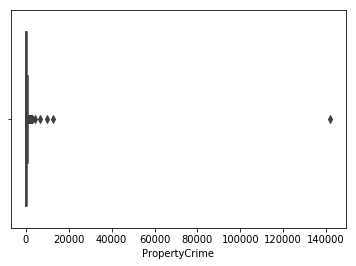

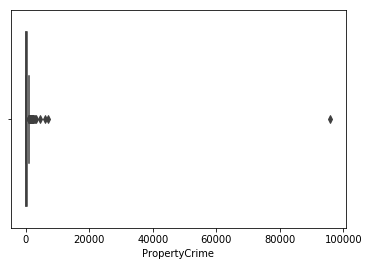

In [727]:
sns.boxplot(dfNY['PropertyCrime'])
plt.show()       
sns.boxplot(dfIL['PropertyCrime'])
plt.show()

/Users/j/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


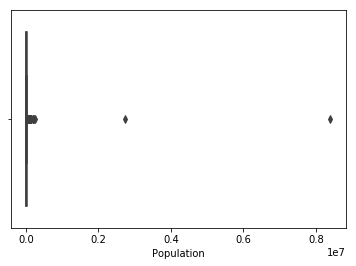

In [728]:
sns.boxplot(df['Population'])
plt.show()


In [729]:
#Drop NY and Chicago. 
df.drop(df[df.Population > 1000000].index, inplace=True)
df.sort_values('PropertyCrime').tail(4)

,Population,ViolentCrime,Murder,Robbery,AggravatedAssault,PropertyCrime,Burglary,Larceny
314,143834.000,1192.000,21.000,400.000,696.000,6473.000,1781.000,4298.000
402,150209.000,2065.000,19.000,394.000,1507.000,7039.000,2001.000,4666.000
276,210562.000,2107.000,42.000,918.000,1055.000,10051.000,2587.000,6855.000
39,258789.000,3249.000,47.000,1322.000,1735.000,12491.000,3458.000,8076.000


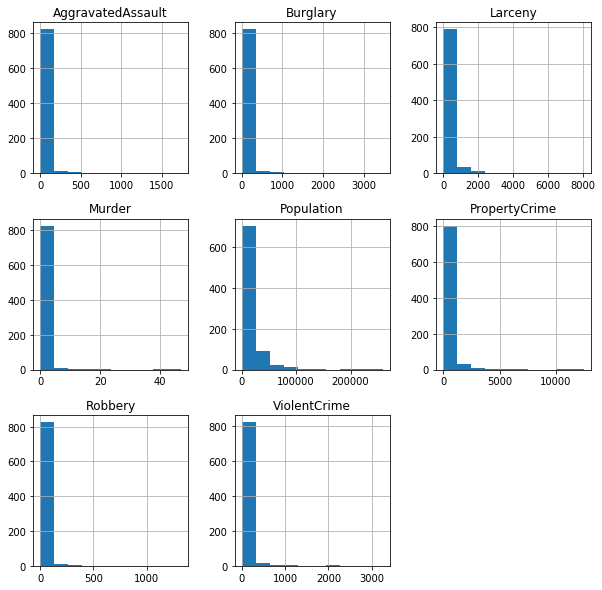

Population  not normal
ViolentCrime  not normal
Murder  not normal
Robbery  not normal
AggravatedAssault  not normal
PropertyCrime  not normal
Burglary  not normal
Larceny  not normal


In [730]:
import scipy
df.hist(figsize = (10,10))
plt.show()


for col in df.columns:
    _,pval = stats.normaltest(df[col])
    if pval > .055:
        print(col, pval)
    else:
        print(col, " not normal")
    
    
   




None of my values are normally distributed and all have a left skew. 

In [731]:
print(df.describe())
print("Variance")
for col in df.columns:
    print(col, np.var(df[col]))



       Population  ViolentCrime  Murder  Robbery  AggravatedAssault  \
count     844.000       844.000 844.000  844.000            844.000   
mean    15173.206        43.127   0.487   13.127             26.246   
std     24196.558       181.688   2.641   66.298            107.797   
min       155.000         0.000   0.000    0.000              0.000   
25%      2544.000         2.000   0.000    0.000              1.000   
50%      7100.000         8.000   0.000    1.000              5.000   
75%     18286.500        24.000   0.000    5.000             15.250   
max    258789.000      3249.000  47.000 1322.000           1735.000   

       PropertyCrime  Burglary  Larceny  
count        844.000   844.000  844.000  
mean         340.519    64.874  262.711  
std          813.292   205.032  573.643  
min            0.000     0.000    0.000  
25%           33.000     6.000   24.750  
50%          112.500    18.000   89.000  
75%          346.000    52.000  282.750  
max        12491.000  34

Population


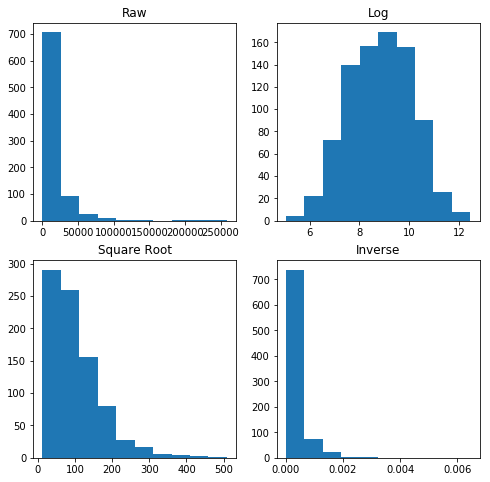

ViolentCrime


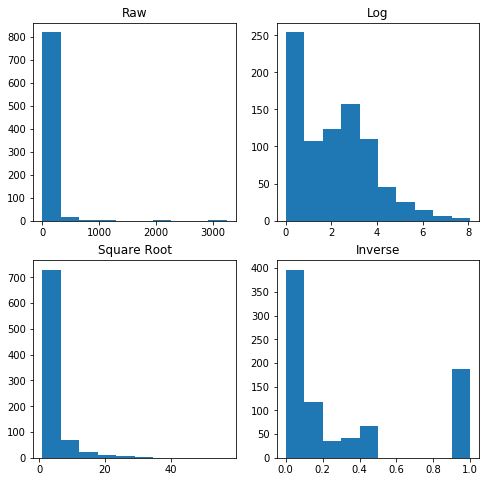

Murder


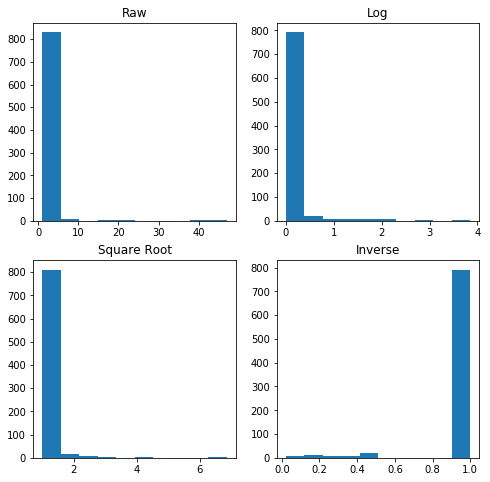

Robbery


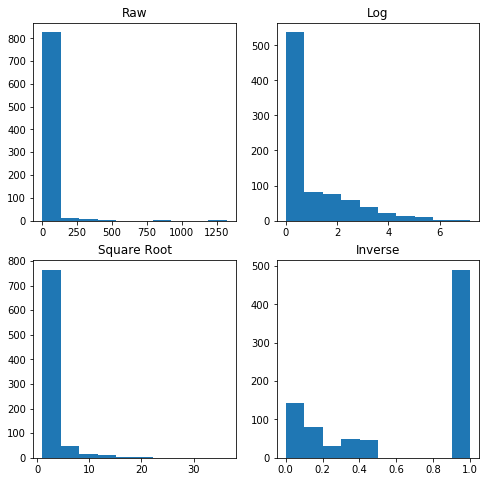

AggravatedAssault


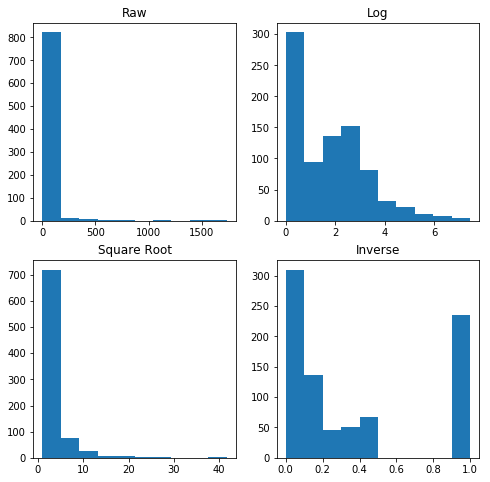

PropertyCrime


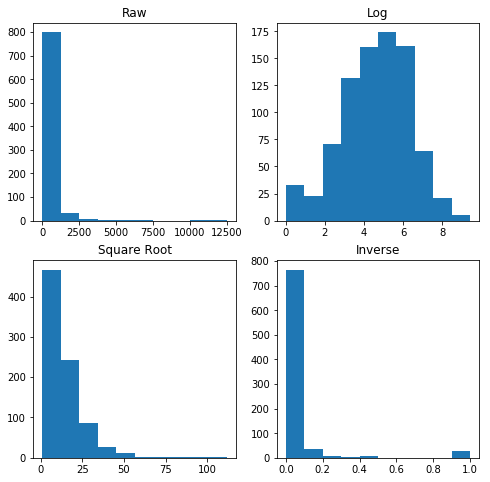

Burglary


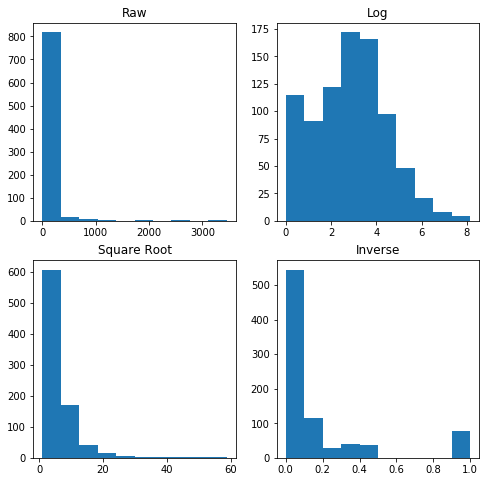

Larceny


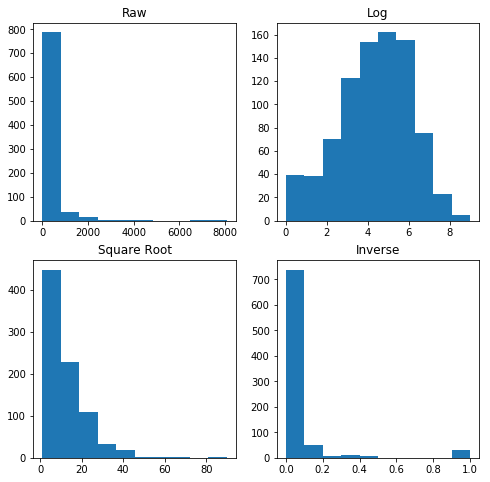

In [732]:
#Making a four-panel plot.
dfPlots = df.copy()
for col in dfPlots.columns:
    dfPlots[col] = df[col].apply(lambda x: 1 if x <1 else x)



for col in dfPlots.columns:
    print(col)
    fig = plt.figure(figsize = (8,8))
    ax1 =plt.subplot(221)
    plt.hist(dfPlots[col])
    plt.title('Raw')
    
    ax2 =plt.subplot(222)
    plt.hist(np.log(dfPlots[col]))
    plt.title('Log')
    
    ax3=plt.subplot(223)
    plt.hist(np.sqrt(dfPlots[col]))
    plt.title('Square Root')
    
    ax4=plt.subplot(224)
    plt.hist(1/dfPlots[col])
    plt.title('Inverse')
    plt.show()
    
    



In [733]:
#Enhance
dfCandidates = pd.DataFrame()
for col in df[['Population','PropertyCrime']]:
    df[col] = df[col].apply(lambda x: 1 if x <1 else x)
df.head(5)

#Transform data
dfCandidates['PopulationLog'] = np.log(dfPlots['Population'])
dfCandidates['ViolentCrimeLog'] = np.log(dfPlots['ViolentCrime'])
dfCandidates['PropertyCrimeLog'] = np.log(dfPlots['PropertyCrime'])
dfCandidates['BurglaryLog'] = np.log(dfPlots['Burglary'])
dfCandidates['LarcenyLog'] = np.log(dfPlots['Larceny'])


for col in dfCandidates.columns:
    _,pval = stats.normaltest(dfCandidates[col])
    if pval > .055:
        print(col, pval, "NORMAL")
    else:
        print(col, pval, " not normal")

print(dfCandidates.describe())
print("Variance")
for col in dfCandidates.columns:
    print(col, np.var(dfCandidates[col]))
    

    

PopulationLog 0.00117683652046  not normal
ViolentCrimeLog 1.38096755796e-08  not normal
PropertyCrimeLog 3.82513863435e-06  not normal
BurglaryLog 0.0745585412091 NORMAL
LarcenyLog 2.66968343288e-05  not normal
       PopulationLog  ViolentCrimeLog  PropertyCrimeLog  BurglaryLog  \
count        844.000          844.000           844.000      844.000   
mean           8.846            2.084             4.581        2.841   
std            1.280            1.655             1.751        1.614   
min            5.043            0.000             0.000        0.000   
25%            7.841            0.693             3.497        1.792   
50%            8.868            2.079             4.723        2.890   
75%            9.814            3.178             5.846        3.951   
max           12.464            8.086             9.433        8.148   

       LarcenyLog  
count     844.000  
mean        4.326  
std         1.767  
min         0.000  
25%         3.209  
50%         4.489  

In [734]:
df['BurglaryLog'] = dfCandidates['BurglaryLog']
df['LarcenyLog'] = dfCandidates['LarcenyLog']

In [735]:
#transform data to be able to use a boxcox 

df['Population'] = df['Population'].apply(lambda x: 1 if x <1 else x)
df['PropertyCrime'] = df['PropertyCrime'].apply(lambda x: 1 if x <1 else x)



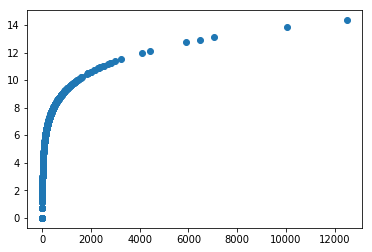

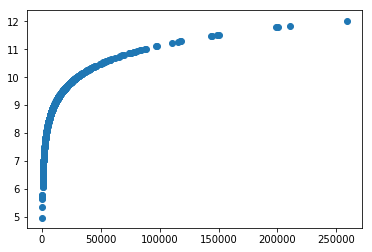

In [736]:
from scipy.stats import boxcox
bc = boxcox(df['PropertyCrime'])

plt.scatter(df['PropertyCrime'], bc[0])
plt.show()

df['PropertyCrimeBC'] = bc[0]

bc1 = boxcox(df['Population'])

plt.scatter(df['Population'], bc1[0])
plt.show()

df['PopulationBC'] = bc1[0]



In [737]:
df['RobberyBinary'] = df['Robbery'].apply(lambda x: 0 if x<1 else 1)
df['MurderBinary'] = df['Murder'].apply(lambda x: 0 if x < 1 else 1)

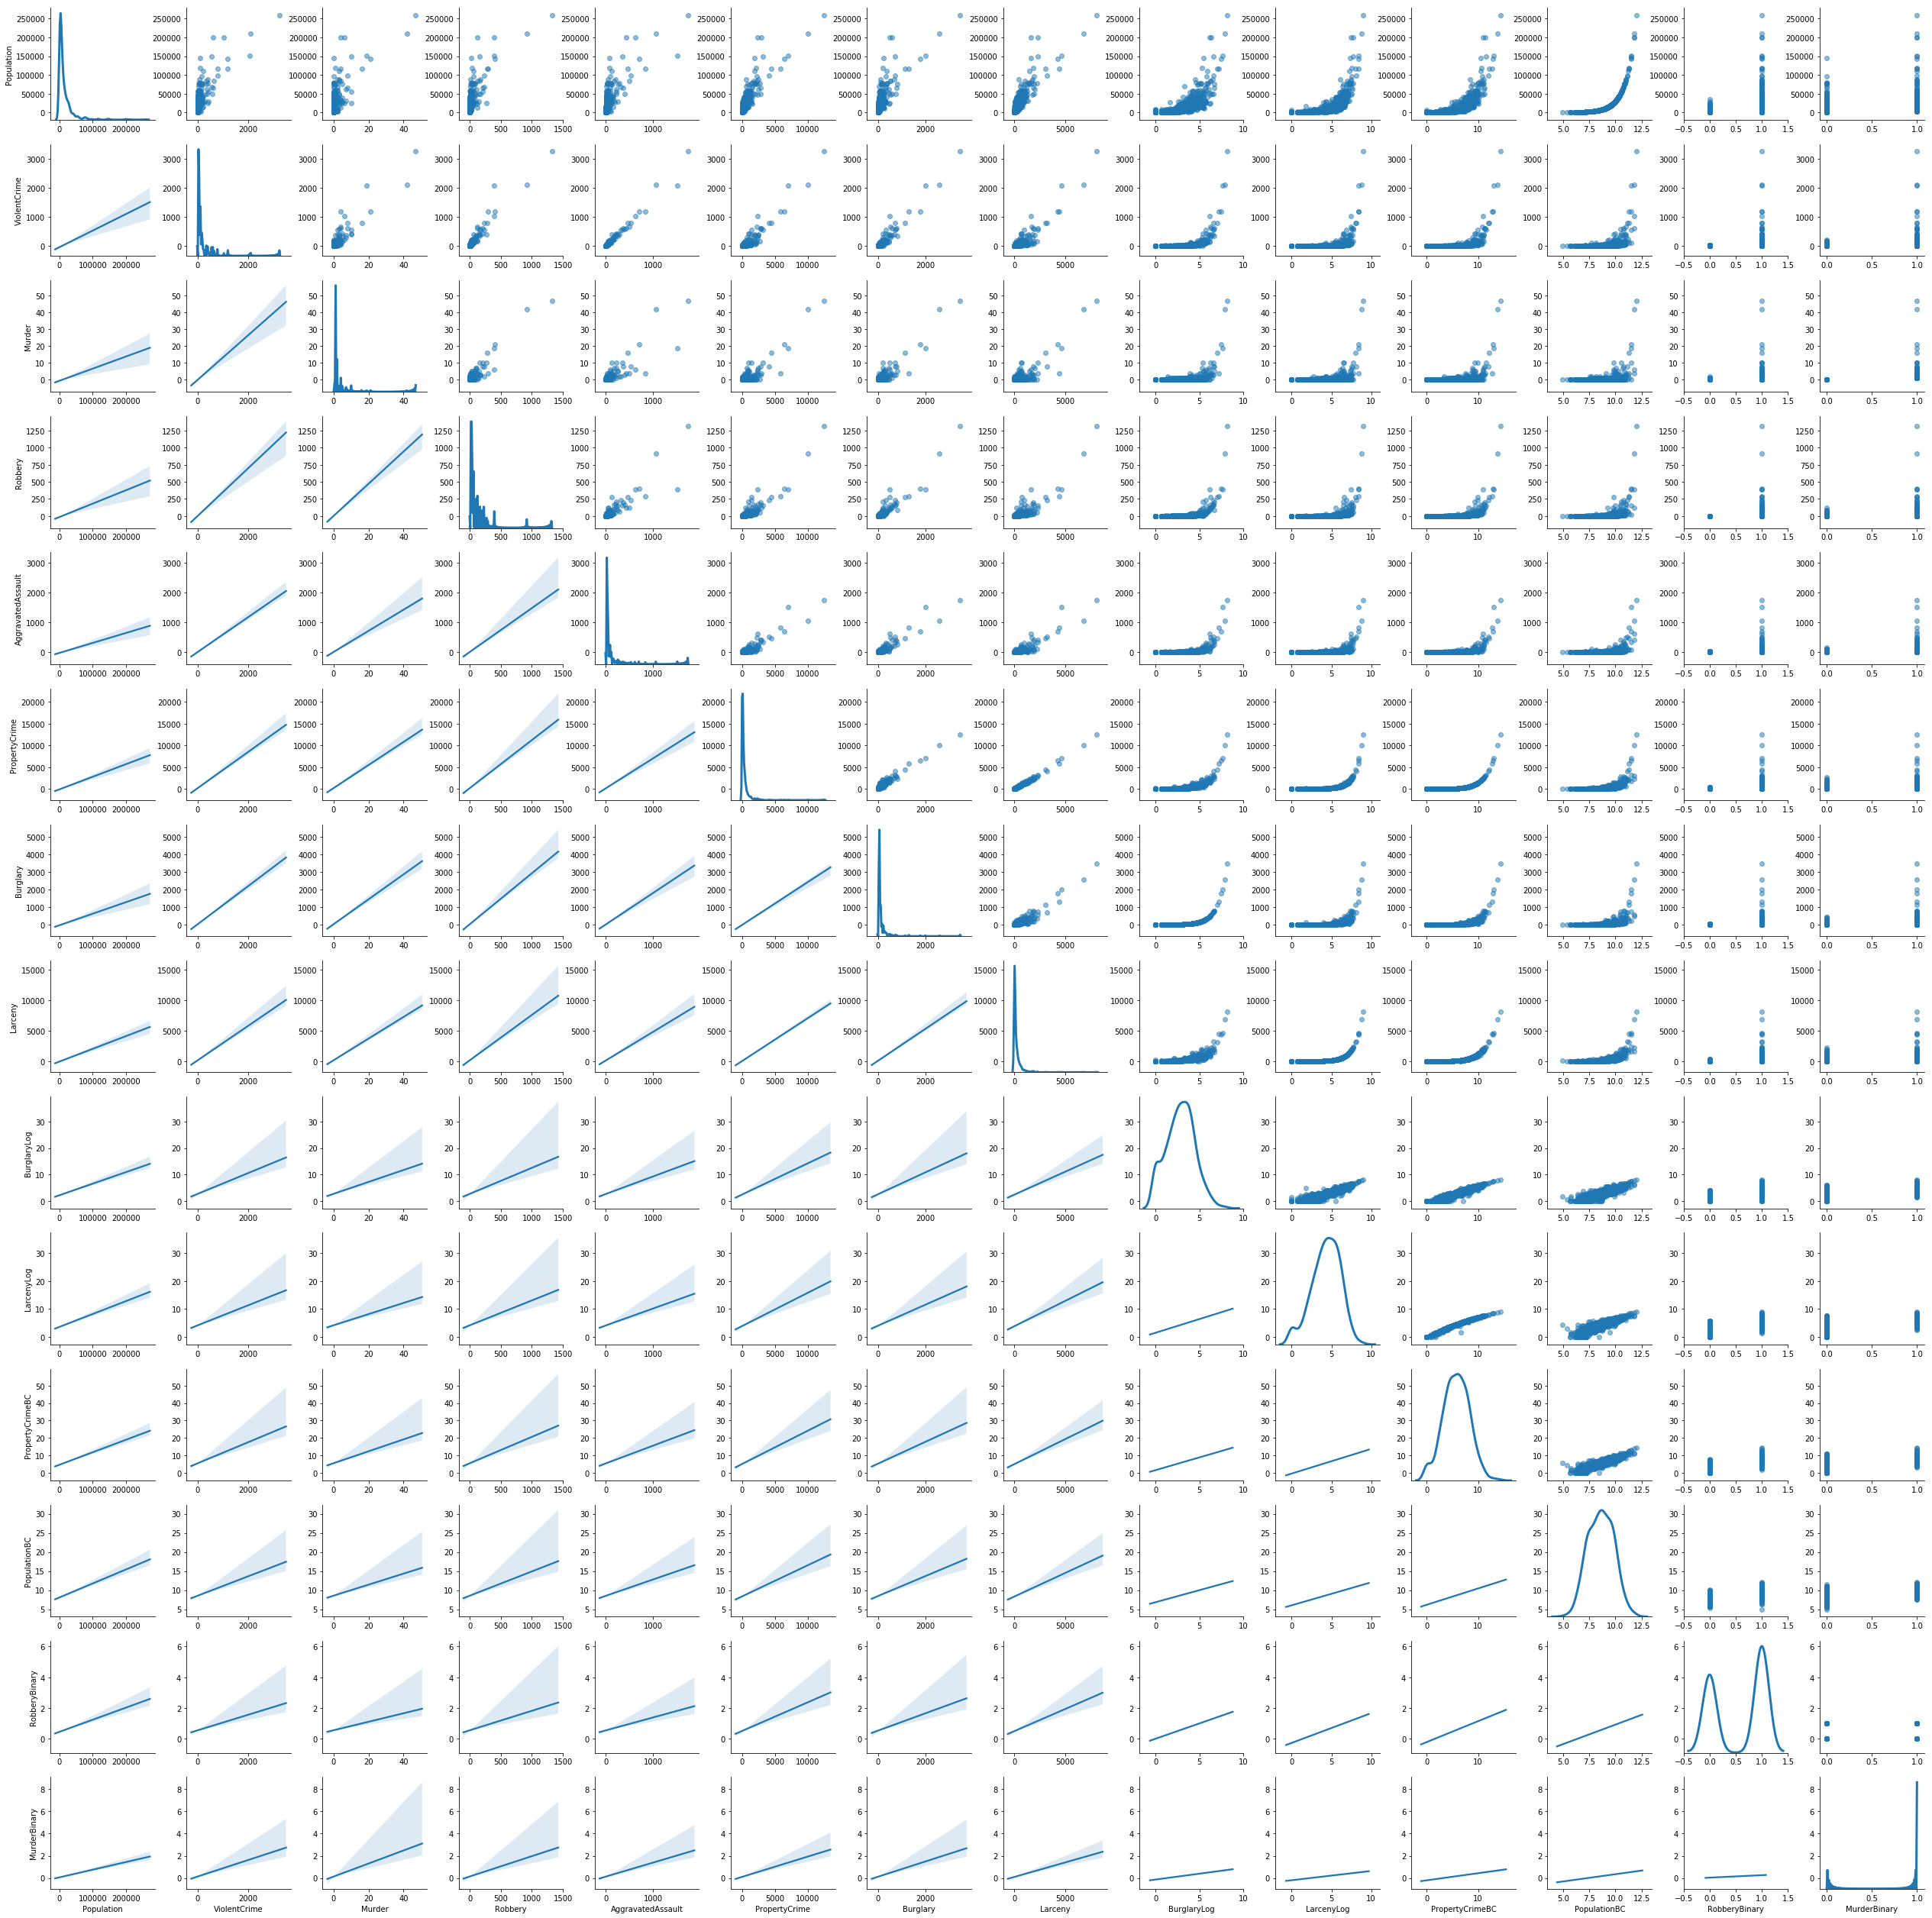

In [713]:
# Declare scatterplot matrix
g = sns.PairGrid(df, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


                   Population  ViolentCrime  Murder  Robbery  \
Population              1.000         0.759   0.664    0.719   
ViolentCrime            0.759         1.000   0.915    0.960   
Murder                  0.664         0.915   1.000    0.938   
Robbery                 0.719         0.960   0.938    1.000   
AggravatedAssault       0.750         0.987   0.866    0.904   
PropertyCrime           0.862         0.931   0.859    0.899   
Burglary                0.777         0.964   0.912    0.938   
Larceny                 0.879         0.894   0.813    0.856   
BurglaryLog             0.655         0.443   0.367    0.403   
LarcenyLog              0.631         0.368   0.297    0.332   
PropertyCrimeBC         0.687         0.435   0.356    0.396   
PopulationBC            0.731         0.381   0.313    0.346   
RobberyBinary           0.385         0.186   0.147    0.170   
MurderBinary            0.456         0.369   0.423    0.331   

                   AggravatedAssault  P

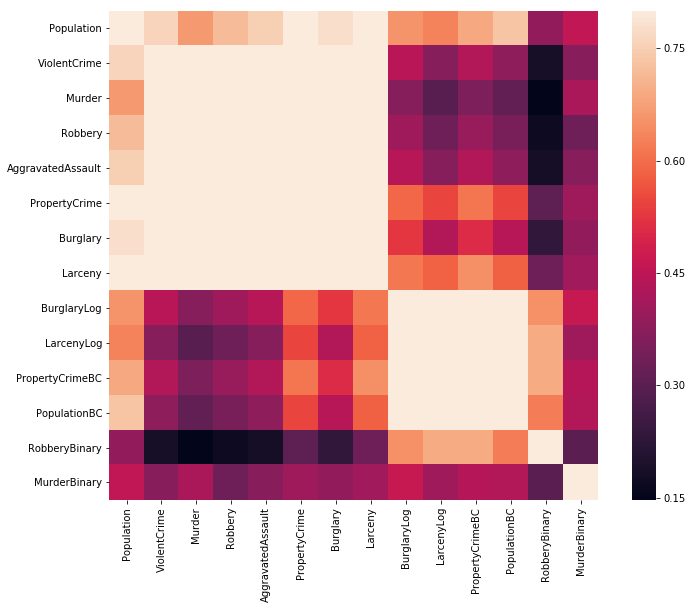

In [714]:

# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

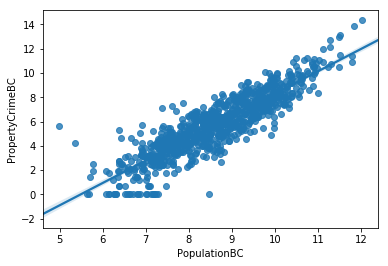

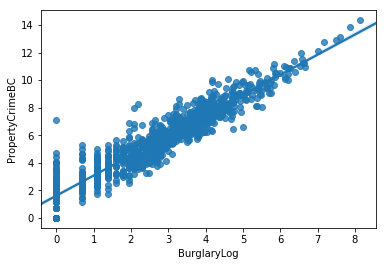

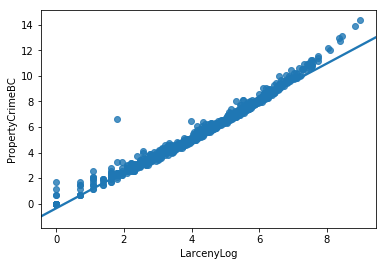

In [715]:
#Enhance

sns.regplot(df['PopulationBC'], df['PropertyCrimeBC'])
plt.show()

sns.regplot(df['BurglaryLog'], df['PropertyCrimeBC'])
plt.show()


sns.regplot(df['LarcenyLog'], df['PropertyCrimeBC'])
plt.show()

## Modeling

In [739]:
X_train = df[['PopulationBC','BurglaryLog','RobberyBinary','MurderBinary', 'LarcenyLog']]


In [740]:
correlation_matrix = X_train.corr()
display(X_train.corr())

,PopulationBC,BurglaryLog,RobberyBinary,MurderBinary,LarcenyLog
PopulationBC,1.000,0.839,0.623,0.433,0.875
BurglaryLog,0.839,1.000,0.651,0.467,0.894
RobberyBinary,0.623,0.651,1.000,0.302,0.692
MurderBinary,0.433,0.467,0.302,1.000,0.402
LarcenyLog,0.875,0.894,0.692,0.402,1.000


In [741]:
#Initialize and fit training data
regr = linear_model.LinearRegression()
Y_train = df['PropertyCrimeBC']
#X_train already set above
regr.fit(X_train, Y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, Y_train))


Coefficients: 
 [ 0.04909993  0.37356687 -0.01259413  0.11855142  1.07111051]

Intercept: 
 -0.36836584051

R-squared:
0.991223791991


In [742]:

# Add PropertyCrimeBC to dataframe 
data = df[['PropertyCrimeBC','PopulationBC','BurglaryLog','RobberyBinary','MurderBinary', 'LarcenyLog']]

# Specify formula
linear_formula = 'PropertyCrimeBC ~ PopulationBC+BurglaryLog+RobberyBinary+MurderBinary+LarcenyLog'

# Run model and print
lm = smf.ols(formula=linear_formula, data=data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        PropertyCrimeBC   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.893e+04
Date:                Wed, 16 May 2018   Prob (F-statistic):               0.00
Time:                        00:07:51   Log-Likelihood:                 19.497
No. Observations:                 844   AIC:                            -26.99
Df Residuals:                     838   BIC:                             1.434
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.3684      0.093     -3.965

In [743]:
#Drop Robbery Binary

In [748]:
# Reinstantiate and fit.
regr = linear_model.LinearRegression()
Y_train = df['PropertyCrimeBC']
X_train = df[['PopulationBC','BurglaryLog','MurderBinary', 'LarcenyLog']]
regr.fit(X_train, Y_train)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_train, Y_train))

# Reorganize data and remove unwanted parameters
dfnew = df[['PropertyCrimeBC', 'PopulationBC','BurglaryLog','MurderBinary', 'LarcenyLog']]

# Update formula
linear_formula = 'PropertyCrimeBC ~ PopulationBC+BurglaryLog+MurderBinary+LarcenyLog'

# Run model and print results
lmNew = smf.ols(formula=linear_formula, data=df).fit()
print(lmNew.summary())


Coefficients: 
 [ 0.04890388  0.37300144  0.11845785  1.06926198]

Intercept: 
 -0.364324363661

R-squared:
0.991220654301
                            OLS Regression Results                            
Dep. Variable:        PropertyCrimeBC   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.368e+04
Date:                Wed, 16 May 2018   Prob (F-statistic):               0.00
Time:                        00:09:03   Log-Likelihood:                 19.346
No. Observations:                 844   AIC:                            -28.69
Df Residuals:                     839   BIC:                            -5.002
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----

In [ ]:
# Set up test data

In [749]:
# create Binarys 
dfAL['MurderBinary'] = dfAL['Murder'].apply(lambda x: 0 if x < 1 else 1)

#Get rid of zeros
dfAL['Burglary'] = dfAL['Burglary'].apply(lambda x: 1 if x < 1 else x)
dfAL['Larceny'] = dfAL['Larceny'].apply(lambda x: 1 if x < 1 else x)
dfAL['PropertyCrime'] = dfAL['PropertyCrime'].apply(lambda x: 1 if x < 1 else x)

#Create Logs
dfAL['BurglaryLog'] = np.log(dfAL['Burglary'])
dfAL['LarcenyLog'] = np.log(dfAL['Larceny'])




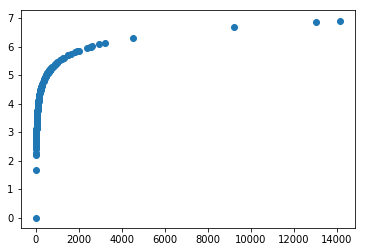

/Users/j/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/Users/j/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:2309: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/Users/j/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/Users/j/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/j/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


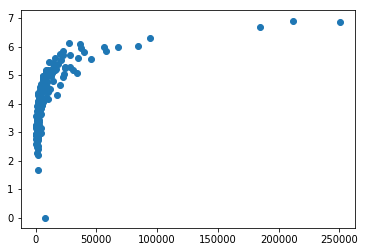

In [750]:
bc2 = boxcox(dfAL['PropertyCrime'])

plt.scatter(dfAL['PropertyCrime'], bc2[0])
plt.show()
dfAL['PropertyCrimeBC'] = bc2[0]

bc3 = boxcox(dfAL['Population'])

plt.scatter(dfAL['Population'], bc2[0])
plt.show()
dfAL['PopulationBC'] = bc2[0]

In [751]:
# Create Test data
Y_test = dfAL['PropertyCrimeBC']
X_test = dfAL[['PopulationBC','BurglaryLog','MurderBinary', 'LarcenyLog']]

# Get results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_test, Y_test))


Coefficients: 
 [ 0.04890388  0.37300144  0.11845785  1.06926198]

Intercept: 
 -0.364324363661

R-squared:
-3.93234861857


As expected, this performed spectactularly horribly on a different data set. I wanted to practice transforming variables and only using features that had normally distributed data. Still wondering if I performed the test/train properly.